# THE DATA

Source: https://huggingface.co/datasets/fancyzhx/ag_news

### It is a NLP/ text classification dataset. The text column consists of news articles from AG News and the Label values are the text classified as 1-4 where 0-World, 1-Sports, 2-Business, 3-Sci/Tech

#### The AG's news topic classification dataset is constructed by choosing 4 largest classes from the original corpus. Each class contains 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000 and testing 7,600.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
from datasets import load_dataset

In [9]:
df = load_dataset('ag_news')

In [10]:
print(df)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})


In [11]:
df_train = pd.DataFrame(df['train'])

In [12]:
df_test = pd.DataFrame(df['test'])

In [13]:
df_train

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0
119996,Renteria signing a top-shelf deal Red Sox gene...,1
119997,Saban not going to Dolphins yet The Miami Dolp...,1
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1


In [14]:
df_test

,text,label
0,Fears for T N pension after talks Unions repre...,2
1,The Race is On: Second Private Team Sets Launc...,3
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3
...,...,...
7595,Around the world Ukrainian presidential candid...,0
7596,Void is filled with Clement With the supply of...,1
7597,Martinez leaves bitter Like Roger Clemens did ...,1
7598,5 of arthritis patients in Singapore take Bext...,2


### Checking if class distributions are balanced

In [15]:
df_train['label'].value_counts()

3    30000
2    30000
1    30000
0    30000
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

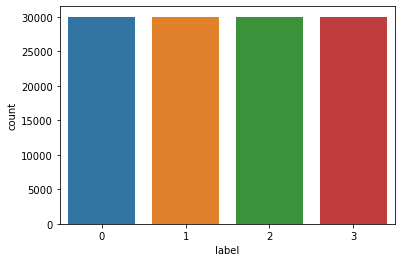

In [16]:
sns.countplot(x=df_train['label'])

## Text classification using machine learning

In [17]:
X = df_train['text']
y = df_train['label']

### splitting training data into training, validation sets for hyperparameter tuning

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)

### converting the text into numerical feature vectors using TDIDF vectorizer

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### Removing all the english stopwords and converting all words to lowercase first

In [21]:
tfidf = TfidfVectorizer(stop_words='english',lowercase=True)

In [22]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [23]:
X_train_tfidf = tfidf.transform(X_train)

In [24]:
X_val_tfidf = tfidf.transform(X_val)

In [52]:
X_tfidf = tfidf.transform(X)

## MultinomialNB model

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
from sklearn.model_selection import GridSearchCV

#### Using gridsearch to search for the best parameters

In [27]:
nb = MultinomialNB()
param_grid = {'alpha':[0.1,0.5,1]}

In [28]:
nb_grid = GridSearchCV(nb,param_grid)

In [29]:
nb_grid.fit(X_train_tfidf,y_train)

GridSearchCV(estimator=MultinomialNB(), param_grid={'alpha': [0.1, 0.5, 1]})

In [30]:
nb_grid.best_params_

{'alpha': 0.1}

#### function to report performance of a model

In [34]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [35]:
def report(model):
    preds = model.predict(X_val_tfidf)
    print(classification_report(y_val,preds))
    plot_confusion_matrix(model,X_val_tfidf,y_val)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      5958
           1       0.96      0.98      0.97      6004
           2       0.88      0.87      0.87      6013
           3       0.88      0.89      0.88      6025

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



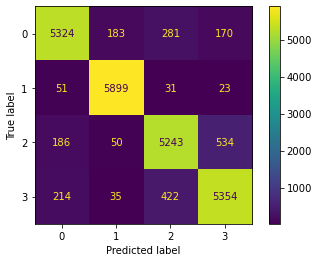

In [36]:
report(nb_grid)

## Logistic Regression Model

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial',max_iter=1000)
log_reg.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      5958
           1       0.96      0.98      0.97      6004
           2       0.89      0.89      0.89      6013
           3       0.89      0.90      0.90      6025

    accuracy                           0.92     24000
   macro avg       0.92      0.92      0.92     24000
weighted avg       0.92      0.92      0.92     24000



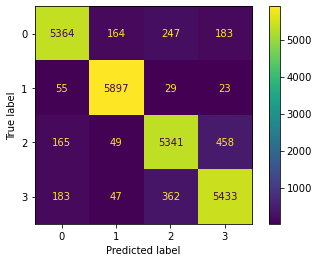

In [46]:
report(log_reg)

## LinearSVC model

In [47]:
from sklearn.svm import LinearSVC

In [ ]:
svc = LinearSVC(max_iter=1000)
penalty = ['l1','l2']
loss = ['hinge','square_hinge']
param_grid = {'penalty':penalty,'loss':loss}
svc_grid = GridSearchCV(svc,param_grid)
svc_grid.fit(X_train_tfidf,y_train)

In [49]:
svc_grid.best_params_

{'loss': 'hinge', 'penalty': 'l2'}

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5958
           1       0.96      0.99      0.97      6004
           2       0.90      0.90      0.90      6013
           3       0.89      0.91      0.90      6025

    accuracy                           0.92     24000
   macro avg       0.92      0.92      0.92     24000
weighted avg       0.92      0.92      0.92     24000



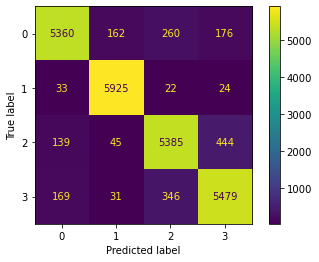

In [50]:
report(svc_grid)

### Creating final models for hold out test set

In [53]:
final_nb = MultinomialNB(alpha=0.1)
final_nb.fit(X_tfidf,y)

MultinomialNB(alpha=0.1)

In [54]:
final_log_model = LogisticRegression(multi_class='multinomial',max_iter=1000)
final_log_model.fit(X_tfidf,y)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [56]:
final_svc = LinearSVC(loss='hinge',penalty='l2',max_iter=10000)
final_svc.fit(X_tfidf,y)

LinearSVC(loss='hinge', max_iter=10000)

### holdout test set

In [57]:
X_test = df_test['text']

In [59]:
y_test = df_test['label']

In [61]:
X_test_tfidf = tfidf.transform(X_test)

#### Redefining report function

In [62]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

### Performance on the test set

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1900
           1       0.95      0.98      0.97      1900
           2       0.87      0.86      0.87      1900
           3       0.88      0.89      0.88      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



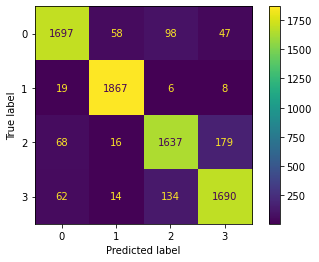

In [63]:
report(final_nb)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1900
           1       0.96      0.98      0.97      1900
           2       0.89      0.88      0.88      1900
           3       0.89      0.90      0.89      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600



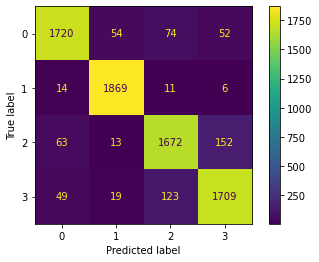

In [64]:
report(final_log_model)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1900
           1       0.96      0.98      0.97      1900
           2       0.89      0.89      0.89      1900
           3       0.89      0.91      0.90      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600



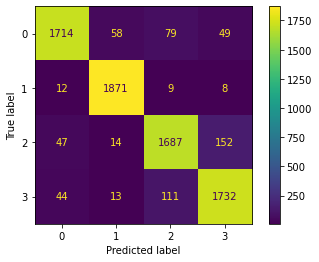

In [65]:
report(final_svc)

  ### Linear SVC model has the best performance

## Finalizing a PipeLine for Deployment on  New Articles

In [66]:
from sklearn.pipeline import Pipeline

In [67]:
pipe = Pipeline([('tfidf',tfidf),('svc',final_svc)])

### Combining train and test datasets so that I can train the pipeline on full data for deployment

In [68]:
X_combined = np.concatenate([X,X_test])
y_combined = np.concatenate([y,y_test])

In [71]:
len(y_combined)

127600

In [72]:
pipe.fit(X_combined,y_combined)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('svc', LinearSVC(loss='hinge', max_iter=10000))])

### Creating example articles to test

In [77]:
new_article = ['Global leaders convene in Geneva to address escalating climate crisis as unprecedented wildfires and flooding impact communities worldwide']
pipe.predict(new_article)

array([0], dtype=int64)

*0 is World news*

In [78]:
new_article = ['Star quarterback Alex Martinez leads his team to a stunning comeback victory with a game-winning touchdown in the final seconds of the championship game']
pipe.predict(new_article)

array([1], dtype=int64)

*1 is sports news*

In [81]:
new_article = ["Breakthrough quantum computing startup QubitTech unveils a new processor that promises to revolutionize data encryption and accelerate complex problem-solving across industries"]
pipe.predict(new_article)

array([3], dtype=int64)

*3 is Tech/science news*

In [83]:
import joblib

In [84]:
joblib.dump(pipe,'final_model_pipeline.pkl')

['final_model_pipeline.pkl']